# From H to H<sub>2</sub><sup>+</sup>

In this notebook, we go from the hydrogen atom to a diatomic system of $\mathrm{H}_2^+$. The goal is to look at the distance dependence of the two nuclei and plot energies and probability densities for the two orbitals involved. The following packages are needed for this notebook:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Orbitals

Each hydrogen atom $I$ has their own 1s atomic orbital, which we can approximate using a simple Slater function
\begin{equation}
    s_I = \mathrm{e}^{-|r-r_I|}. \tag{1}
\end{equation}
We can then define the bonding $\sigma$ molecular orbital and the antibonding $\sigma^*$ molecular orbital as linear combinations of the two atomic orbitals:
\begin{equation}
    \sigma = \frac{1}{\sqrt{2 + 2 * S}} \left(s_A + s_B\right) \tag{2}
\end{equation}
and
\begin{equation}
    \sigma^* = \frac{1}{\sqrt{2 - 2 * S}} \left(s_A - s_B\right). \tag{3}  
\end{equation}
$S$ is the overlap matrix and defined as
\begin{equation}
    S = \braket{s_A|s_B}. \tag{4}
\end{equation}

### Exercise 1

Plot the following probability densities for different distances between the two nuclei of $\mathrm{H}_2^+$ using the definitions above:
 - The probability density of the bonding $\sigma$ orbital: $\sigma^2$
 - The probability density of the antibonding $\sigma^*$ orbital: $(\sigma^*)^2$
 - The probability density of the average of the two atomic orbitals: $(s_A^2 + s_B^2)/2$
 - The probability density of the difference of the two molecular orbitals: $\sigma^2$ - $(\sigma^*)^2$


In [68]:
def s(r, rI):
    return np.exp(-np.abs(r - rI))

def calc_overlap(distance):
    return (1 + distance + distance**2 / 3) * np.exp(-distance)

def plot(distance=2):
    r = np.linspace(-10, 10, 10000)
    sA = s(r, -distance / 2)
    sB = s(r, distance / 2)
    S = calc_overlap(distance)
    sigma = 1 / (np.sqrt(2 + 2 * S)) * (sA + sB)
    sigma2 = 1 / np.sqrt(2 - 2 * S) * (sA - sB)
    plt.plot(r, sigma**2, label=r'$\sigma^2$')
    plt.plot(r, sigma2**2, label=r'$(\sigma^*)^2$')
    plt.plot(r, (sA**2 + sB**2) / 2, label=r'$(s_A^2 + s_B^2)/2$')
    plt.plot(r, (sigma**2 - sigma2**2), label=r'$\sigma^2 - (\sigma^*)^2$')
    plt.legend()
    plt.show()

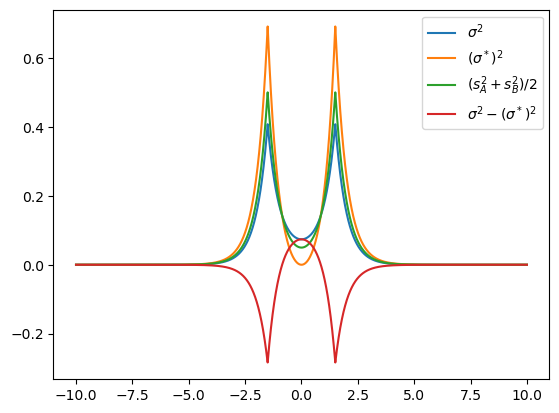

In [69]:
plot(3)

## Energies

For this simple system, the total energy of the system is defined as
\begin{equation}
    E = \varepsilon(\sigma) + V_{\mathrm{nuc,nuc}}, \tag{5}
\end{equation}
where $\epsilon(\sigma)$ is the orbital energy of the $\sigma$ orbital and $V_{\mathrm{nuc,nuc}}$ is the nuclear repulsion between the two nuclei.
In atomic units, the orbital energies can be calculated using
\begin{equation}
    \varepsilon_{\sigma,\sigma^*} = E_{H1s} - \frac{j(R) \pm k(R)}{1 \pm S} \tag{6}
\end{equation}
with 
\begin{equation}
    j(R) = \frac{1}{R} \left(1 - \left(1 + R\right)\mathrm{e}^{-2R}\right) \tag{7}
\end{equation}
and
\begin{equation}
    k(R) = \left(1 + R\right)\mathrm{e}^{-R}. \tag{8}
\end{equation}
The nuclear repulsion energy for this diatomic system is defined as
\begin{equation}
    V_{\mathrm{nuc,nuc}} = \frac{1}{R}. \tag{9}
\end{equation}

### Exercise 2

Next, plot the orbital energies of $\sigma$ and $\sigma^*$ as a function of the distance between the two hydrogen atoms.

Also plot the total energy.

In [ ]:
def plot_orbital_energies():
    distances = np.linspace(0.5, 10, 100)
    energies_sigma = []
    energies_sigma_star = []
    for d in distances:
        S = calc_overlap(d)
        e_sigma = energy(d, sigma=True)
        e_sigma_star = energy(d, sigma=False)
        energies_sigma.append(e_sigma)
        energies_sigma_star.append(e_sigma_star)
    plt.plot(distances, energies_sigma, label=r'$\epsilon(\sigma)$')
    plt.plot(distances, energies_sigma_star, label=r'$\epsilon(\sigma^*)$')
    plt.title(r"Orbital energies of $\mathrm{H}_2^+$")
    plt.xlabel('R')
    plt.ylabel('Orbital Energy / Hartree')
    plt.legend()
    plt.show()

def plot_energy():
    distances = np.linspace(0.5, 10, 100)
    energies_sigma = []
    for d in distances:
        e_sigma = energy(d, sigma=True) + 1/d
        energies_sigma.append(e_sigma)
    plt.plot(distances, energies_sigma, label=r'$E(\sigma)$')
    plt.title(r"Total energy of $\mathrm{H}_2^+$")
    plt.xlabel('R')
    plt.ylabel('Total Energy / Hartree')
    plt.show()

def energy(distance, sigma = True):
    S = calc_overlap(distance)
    e = -0.5
    if sigma:
        e -= ((j(distance) + k(distance)) / (1 + S))
    else:
        e -= ((j(distance) - k(distance)) / (1 - S))
    return e

def j(distance):
    return 1/distance * (1 - (1 + distance) * np.exp(-2 * distance))

def k(distance):
    return (1 + distance) * np.exp(-distance)

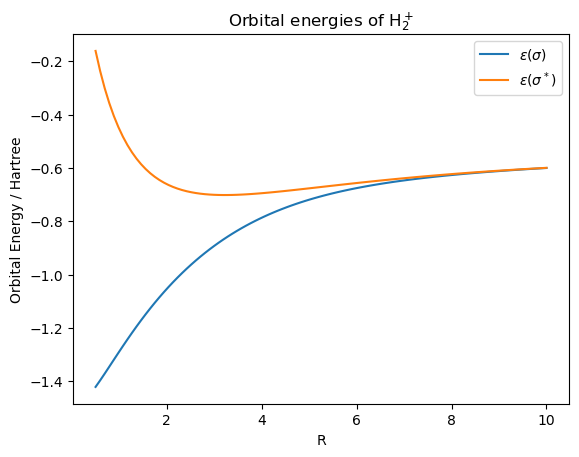

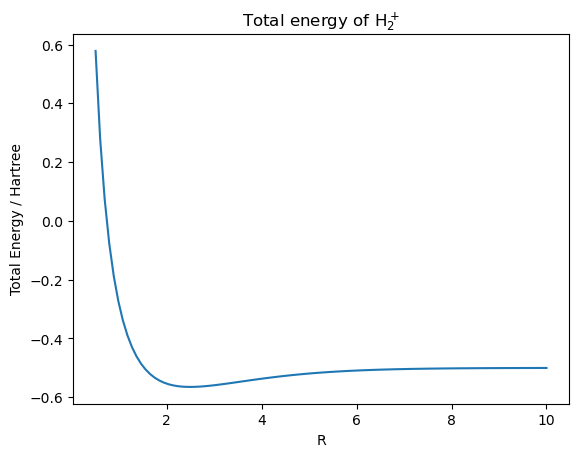

In [118]:
plot_orbital_energies()
plot_energy()